# Heart Disease Classification (Group 5)


## Introduction
---

Heart disease is a common health condition that affects many people around the world, with coronary disease being a significant contributor to its prevalence. Coronary artery disease refers to the buildup of plaque in the wall of the arteries that supply blood to the heart, otherwise known as atherosclerosis. Plaque buildup will cause the inside of the arteries to narrow over time, leading to reduced blood flow to the heart muscle. Various diagnostic measures, such as cholesterol levels, blood pressure, and electrocardiogram (ECG) readings, play crucial roles in assessing the presence and severity of this condition. Given the significant impact of coronary disease on public health, predictive analytics can help us gain a better understanding of the relationship between risk factors and disease development, ultimately guiding efforts to prevent and manage heart disease effectively.

Through our predictive analysis, we hope to address the following question: 

**Question:** How can we use diagnostic measurements such as age, resting blood pressure, serum cholesterol, maximum heart rate, and ST depression to classify whether a patitent has heart disease? (Presence = 1,2,3,4; Absence = 0).

**Our dataset:** The dataset we have selected is a subset of a heart disease diagnosis database that contains information about 303 unique patients undergoing angiography at the Cleveland Clinic in Cleveland, Ohio. Each entry contains 14 attributes for each patient as listed in the following: 

| Attribute                                           | Key         | Description         |
| ---                                                 | ---         |     ---             |
| Age                                                 | age         | ---                 |
| Sex                                                 | sex         | ---                 |
| Chest pain type                                     | cp          | 1 = Typical angina, 2 = Atypical angina, 3 = Non-anginal pain, 4 = Asymptomatic |
| Resting blood pressure                              | trestbps    | In mm Hg on admission to the hospital |
| Serum cholesterol                                   | chol        | In mg/dl            |
| Fasting blood sugar > 120 mg/dl                     | fbs         | 0 = false, 1 = true |
| Resting electrocardiographic results                | restecg     | 0 = Normal, 1 = ST-T wave abnormality, 2 = Probable/definite left ventricular hypertrophy |
| Maximum heart rate achieved                         | thalach     | In bpm              |
| Exercise induced angina                             | exang       | 0 = No, 1 = Yes     |
| ST depression induced by exercise relative to rest  | oldpeak     | --- |
| The slope of the peak exercise ST segment           | slope       | 1 = Upsloping, 2 = Flat, 3 = Downsloping |
| Number of major vessels (0-3) colored by flourosopy | ca          | --- |
| Exercise Thallium heart scan                        | thal        | 3 = Normal, 6 = Fixed defect, 7 = Reversable defect |
| Angiographic disease status                         | num / status| 0 = < 50% diameter narrowing (Absence), 1 = > 50% diameter narrowing (Presence)|** 

## Methods
---

### Overview

In order to answer our question, the following steps were taken in our analysis:

> #### Preprocessing and Exploratory Data Analysis
> 
> 1. Loaded the data from the original source on the web
>    
> 2. Cleaned and tidied the data by reassigning the columns and factor values to relevant names so that we can interpret them, and renamed our target attribute to `status`
>
> 3. Split our data into training and testing sets, and computed summary statistics of potential predictors using the training set
>
> 4. Visualized the distribution and relationship between potential predictors in order to choose the predictors that best fit our analysis

> #### Building and Tuning the Classifier
> We are using the K-nearest neighbour classification method to classify whether or not a patient has heart disease. Our next steps taken were to build and tune our K-NN classifier based on our chosen predictors:
>
> 1.  Created a `recipe` with our predictors and standardized the data
>
> 2.  Created a $k$-nearest model with  `neighbors = tune()` to find the most optimal $k$-value
>
> 3.  Performed 5-fold cross-validation with $k$-values ranging from 1 to 50
>
> 4.  Created a workflow to combine the recipe and model, and used `tune_grid()` for cross-validation
>

> #### Choosing the best $k$ value
>
> 1. Used `collect_metrics()` to collect the results from the cross-validation and filtered for accuracy for each value of $k$
> 
> 2. Visualized the result using a line plot with $k$ values and accuracy estimate
>
> 3. Ensured that our chosen $k$ value provides a consistent accuracy

> #### Classification and Testing
>
> 1. Re-trained our classifier by making a new model specification with the chosen $k$-value and fitting the classifier to our training set
>
> 2. Evaluated the classifier's predicition accuracy using the testing data
>
> 3. Created a confusion matrix to get a better idea of how the classification model performed


### Preprocessing and Exploratory Data Analysis 🔎

#### Loading Libraries 

In [1]:
# Importing libraries
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)
library(ggplot2)
install.packages("gridExtra")
library("gridExtra")

# Formatting graphs
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

#### Reading the data

First, we imported the dataset from the web and saved it to a dataframe called `heart_disease_data`.

In [2]:
# Loading in the dataset from the web
heart_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                          col_names = FALSE)
heart_disease_data
cat("\nTable 1.1: Unprocessed Cleveland Heart Disease Data")

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0



Table 1.1: Unprocessed Cleveland Heart Disease Data

#### Cleaning and tidying the data

Since the columns in the dataset have no headings, we set `col_names` to FALSE initially and renamed the columns based on the varible names given on the website. We also renamed our target variable from `num` to be `status`, which takes values 0 (Absence) or 1,2,3,4 (Presence), and used `as_factor` to treat it as a factor.

In [3]:
# Renaming column headers
colnames(heart_disease_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "status")

# Changing status to be a factor
heart_disease_data <- heart_disease_data |>
                mutate(status = as_factor(status)) |>
                mutate(status = fct_recode(status, "Absense" = "0", "Presence" = "1", "Presence" = "2", "Presence" = "3", "Presence" = "4"))

heart_disease_data
cat("\nTable 1.2: Cleaned Cleveland Heart Disease Data")

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,Absense
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,Presence
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,Presence
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Presence
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Presence
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,Absense



Table 1.2: Cleaned Cleveland Heart Disease Data

Next, we filtered out all invalid data from our dataset, which includes any NA values in the columns. Since we are dealing with a classification problem, we also removed all non-numerical predictor variables.

In [4]:
# Removing unnecessary variables
heart_data <- heart_disease_data |>
              select(age, trestbps, chol, thalach, oldpeak, status)

# Filtering out NA values
heart_clean <- heart_data |>
               filter(!is.na(age) & !is.na(trestbps) & !is.na(chol) & !is.na(thalach) & !is.na(oldpeak))

heart_clean
cat("\nTable 1.3: Cleaned and Filtered Cleveland Heart Disease Data")

age,trestbps,chol,thalach,oldpeak,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,Absense
67,160,286,108,1.5,Presence
67,120,229,129,2.6,Presence
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,Presence
57,130,236,174,0.0,Presence
38,138,175,173,0.0,Absense



Table 1.3: Cleaned and Filtered Cleveland Heart Disease Data

Now our data is all cleaned and ready to be used!

#### Summarizing the data

After cleaning the dataset, we split our dataset into training (75%) and testing (25%) sets using `initial_split()` and set a seed value in order to make our work reproducible. We are going to use only training data from this point on for our data exploration.

In [5]:
# Set initial seed
set.seed(21)

# Splitting dataframe into training, testing datasets
heart_split <- initial_split(heart_data, prop = 0.75, strata = status)

heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_train 
cat("\n Table 2.1: Training Data")

age,trestbps,chol,thalach,oldpeak,status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,Absense
37,130,250,187,3.5,Absense
41,130,204,172,1.4,Absense
⋮,⋮,⋮,⋮,⋮,⋮
68,144,193,141,3.4,Presence
57,130,131,115,1.2,Presence
57,130,236,174,0.0,Presence



 Table 2.1: Training Data

First, we have derived some summary statistics for each of the predictor values in our dataset. The following table displays the mean of each predictor variable and the count of each observation, grouped by the patients with and without presence of heart disease in the dataset.

In [6]:
# summarizing to get mean of each predictor
heart_summary <- heart_train |>
                    group_by(status) |>
                    summarize(mean_age = mean(age), mean_trestbps = mean(trestbps), mean_chol = mean(chol), 
                              mean_thalach = mean(thalach), mean_oldpeak = mean(oldpeak), n_count = n())

heart_summary
cat("\n Table 2.2: Mean values for each predictor in Training Data")

status,mean_age,mean_trestbps,mean_chol,mean_thalach,mean_oldpeak,n_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Absense,52.38211,128.5366,243.6016,159.1626,0.6390244,123
Presence,56.34615,132.7788,251.7308,137.3462,1.4971154,104



 Table 2.2: Mean values for each predictor in Training Data

From Table 2.2, we can see that patients with heart disease tend to be older, have higher resting blood pressure, higher cholesterol, lower maximum heart rate, and higher ST depression. We can also see that the number of patients with and without heart disease are roughly balanced in the training set, which means our classifier is unlikely to be biased.

#### Visualizing the data

In order to decide which predictor variables to use and further visualize the distinction between patients with and without heart disease, we displayed the distribution of the potential predictors below using histograms.

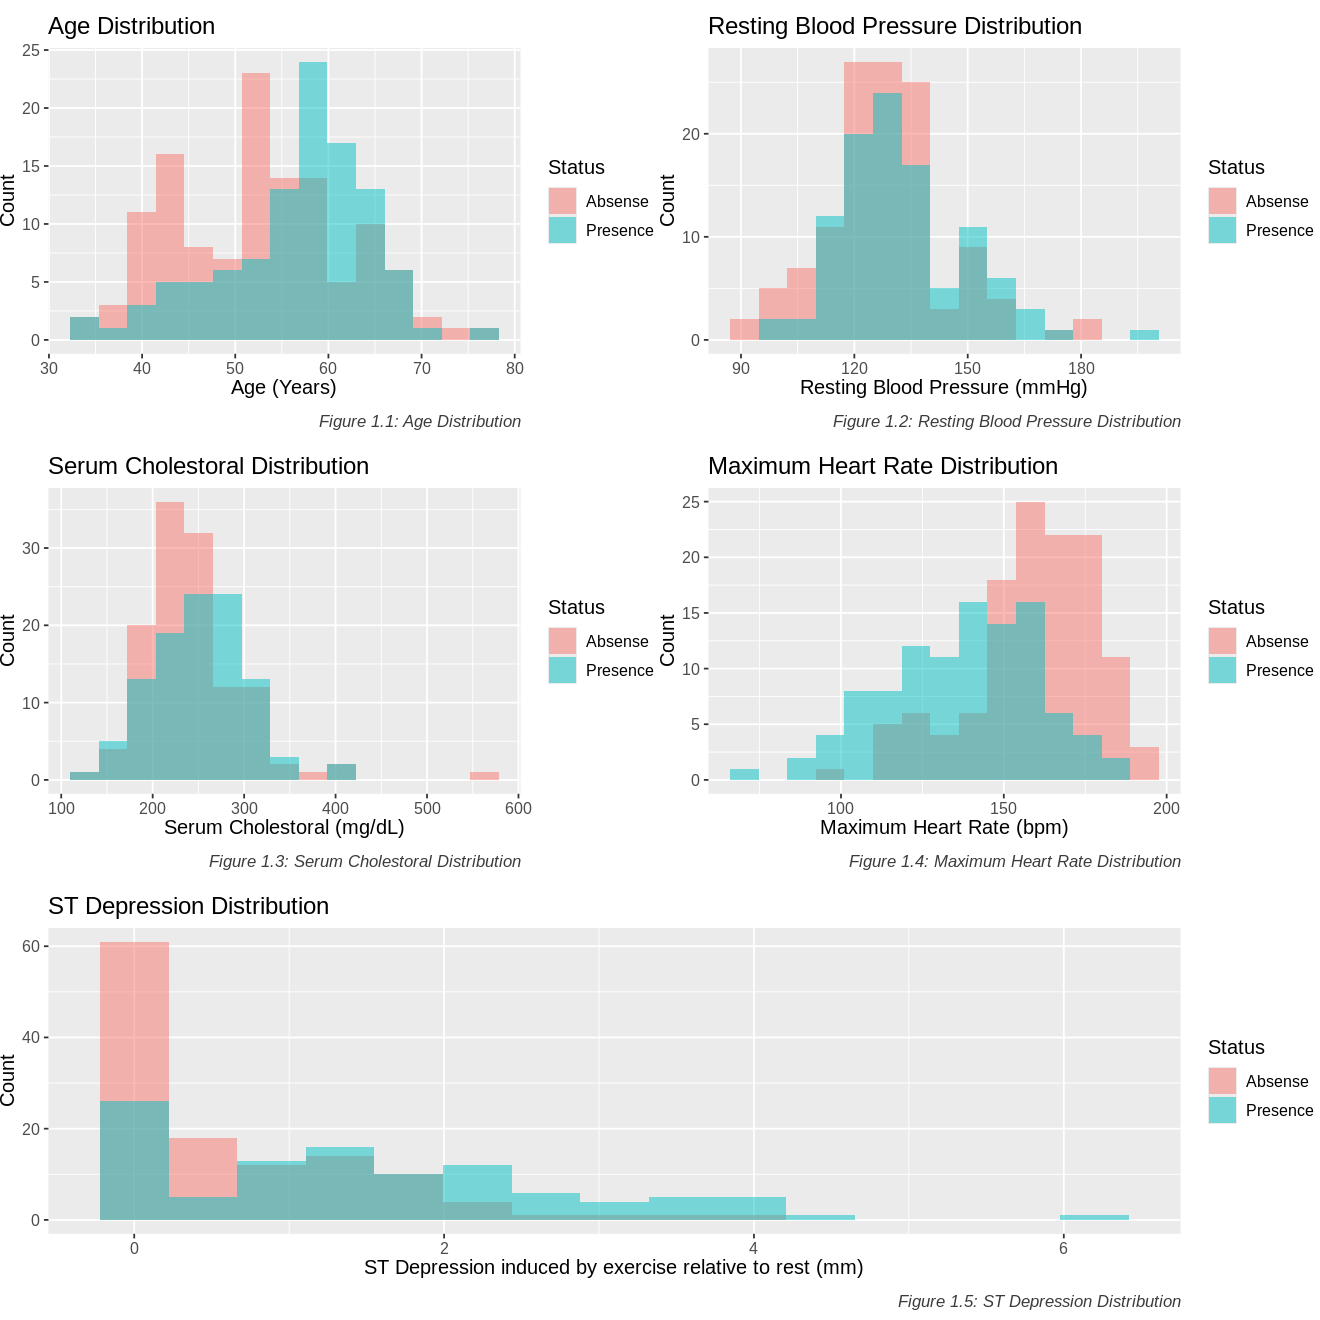

In [7]:
options(repr.plot.width=11, repr.plot.height=11)
# Age Distribution
age_distribution <- ggplot(heart_train, aes(x = age, fill = status)) + 
                    geom_histogram(position = 'identity', bins = 15, alpha = 0.5) +
                    labs(x = "Age (Years)", y = "Count", fill = "Status", caption = "Figure 1.1: Age Distribution") +
                    ggtitle("Age Distribution") +
                    theme(text = element_text(size = 12)) +
                    theme(plot.caption = element_text(hjust = 1, vjust = -1, size = 10, face = "italic", color = "#3B3B3B")) +
                    theme(plot.margin = margin(10, 0, 10, 0))

# Resting Blood Pressure Distribution
trestbps_distribution <- ggplot(heart_train, aes(x = trestbps, fill = status)) + 
                        geom_histogram(position = 'identity', bins = 15, alpha = 0.5) +
                        labs(x = "Resting Blood Pressure (mmHg)", y = "Count", fill = "Status", caption = "Figure 1.2: Resting Blood Pressure Distribution") +
                        ggtitle("Resting Blood Pressure Distribution") +
                        theme(text = element_text(size = 12)) +
                        theme(plot.caption = element_text(hjust = 1, vjust = -1, size = 10, face = "italic", color = "#3B3B3B")) +
                        theme(plot.margin = margin(10, 0, 10, 0))

# Serum Cholestoral Distribution
chol_distribution <- ggplot(heart_train, aes(x = chol, fill = status)) + 
                     geom_histogram(position = 'identity', bins = 15, alpha = 0.5) +
                     labs(x = "Serum Cholestoral (mg/dL)", y = "Count", fill = "Status", caption = "Figure 1.3: Serum Cholestoral Distribution") +
                     ggtitle("Serum Cholestoral Distribution") +
                     theme(text = element_text(size = 12)) +
                     theme(plot.caption = element_text(hjust = 1, vjust = -1, size = 10, face = "italic", color = "#3B3B3B")) +
                     theme(plot.margin = margin(10, 0, 10, 0))

# Maximum Heart Rate Distribution
thalach_distribution <- ggplot(heart_train, aes(x = thalach, fill = status)) + 
                        geom_histogram(position = 'identity', bins = 15, alpha = 0.5) +
                        labs(x = "Maximum Heart Rate (bpm)", y = "Count", fill = "Status", caption = "Figure 1.4: Maximum Heart Rate Distribution") +
                        ggtitle("Maximum Heart Rate Distribution") +
                        theme(text = element_text(size = 12)) +
                        theme(plot.caption = element_text(hjust = 1, vjust = -1, size = 10, face = "italic", color = "#3B3B3B")) +
                        theme(plot.margin = margin(10, 0, 10, 0))

# ST depression Distribution
oldpeak_distribution <- ggplot(heart_train, aes(x = oldpeak, fill = status)) + 
                        geom_histogram(position = 'identity', bins = 15, alpha = 0.5) +
                        labs(x = "ST Depression induced by exercise relative to rest (mm)", y = "Count", fill = "Status", caption = "Figure 1.5: ST Depression Distribution") +
                        ggtitle("ST Depression Distribution") +
                        theme(text = element_text(size = 12)) +
                        theme(plot.caption = element_text(hjust = 1, vjust = -1, size = 10, face = "italic", color = "#3B3B3B")) +
                        theme(plot.margin = margin(10, 0, 10, 0))

grid.arrange(age_distribution, trestbps_distribution, chol_distribution, thalach_distribution, oldpeak_distribution, 
             ncol = 2, nrow = 3, widths = c(1, 1), layout_matrix = rbind(c(1, 2), c(3, 4), c(5, 5)))

#### Choosing Predictors

From the figures above (Figures 1.1 to 1.5), it appears that patients with heart disease tend to be older, have lower maximum heart rate, and higher ST depression, which correspond with our findings from Table 2.2. On the other hand, it is difficult to find a significant distinction in the levels of cholesterol and resting blood pressure for patients with and without heart disease since their distributions are roughly the same. Therefore, both cholesterol and resting blood pressure do not seem to be particularly good predictors for our analysis.

Based on our background research, we found that:

- Patients with a higher age are more likely to have heart disease, as age correlates to increased risk due to deteriorating cardiovascular functions (Rodgers et al., 2019).
- Maximum heart rate has a close inverse relationship to age (Lach et al., 2012). As heart disease risk increases with age, we may find that patients with lower heart rate, likely signifying a higher age, would lead to a higher probability of heart disease.
- ST depression induced by exercise relative to rest is a possible result seen on electrocardiograms that can help diagnose coronary atherosclerosis (Lanza et al., 2002). Therefore, we may see that higher ST depression is linked to cases of heart disease.

Visualizing the data helped us identify the best predictors to use, which ended up aligning with our background research. Subsequently, we decided to use **Age (age)**, **Maximum Heart Rate (thalach)** and **ST Depression (oldpeak)** as the predictors of our model.  

### Building and Tuning the Classifier 🔧

#### Creating the Model

> To create our model, the following steps were taken:
> 
> 1. Created a `recipe` to predict `status`, with `age`, `thalach`, and `oldpeak` as our predictors. Scaling and centering were performed using `step_scale()` and `step_center()`
>
> 2. Created our classification model with `nearest_neighbor()` and set `neighbors = tune()` to find the most optimal $k$-value.
>
> 3. Performed 5-fold cross-validation with $k$-values ranging from 1 to 50, stratifying by `status`, and created a dataframe with $k$-values using `tibble`
> > We chose a range from 1 to 50 for cross-validation because that gives us a broad range of $k$ values while running within a reasonable timeframe
> 4. Created a workflow to combine the recipe and model, and used `tune_grid()` for cross-validation
> 5. Used `collect_metrics()` to collect the results from the cross-validation and filtered for accuracy for each value of $k$

In [8]:
set.seed(21)

# Creating the recipe and standardizing the data
heart_recipe <- recipe(status ~ age + thalach + oldpeak, data = heart_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

# Creating the K-NN model specification and tuning it
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Performing a 5-fold cross validation with K values ranging from 1 to 50
heart_vfold <- vfold_cv(heart_train, v = 5, strata = status)
gridvals <- tibble(neighbors = seq(1, 50))

# Collecting the results from the cross validation
knn_results <- workflow() |>
               add_recipe(heart_recipe) |>
               add_model(knn_tune) |>
               tune_grid(resamples = heart_vfold, grid = gridvals) |>
               collect_metrics() |>
               filter(.metric == "accuracy")

# Display results
knn_results
cat("\nTable 3.1: Cross Validation Results")

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6432148,5,0.009871756,Preprocessor1_Model01
2,accuracy,binary,0.6432148,5,0.009871756,Preprocessor1_Model02
3,accuracy,binary,0.6784805,5,0.026442290,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,binary,0.7355029,5,0.02218006,Preprocessor1_Model48
49,accuracy,binary,0.7224594,5,0.02228569,Preprocessor1_Model49
50,accuracy,binary,0.7224594,5,0.02228569,Preprocessor1_Model50



Table 3.1: Cross Validation Results

### Choosing the best $k$-value 📝

#### Visualizing Accuracy

In order to determine the best $k$-value, we plotted a line graph of accuracy vs $k$ to visualize the results.

Warning message in geom_point(aes(x = 25, y = chosen_k), size = 2, colour = "red"):
“All aesthetics have length 1, but the data has 50 rows.
ℹ Did you mean to use `annotate()`?”


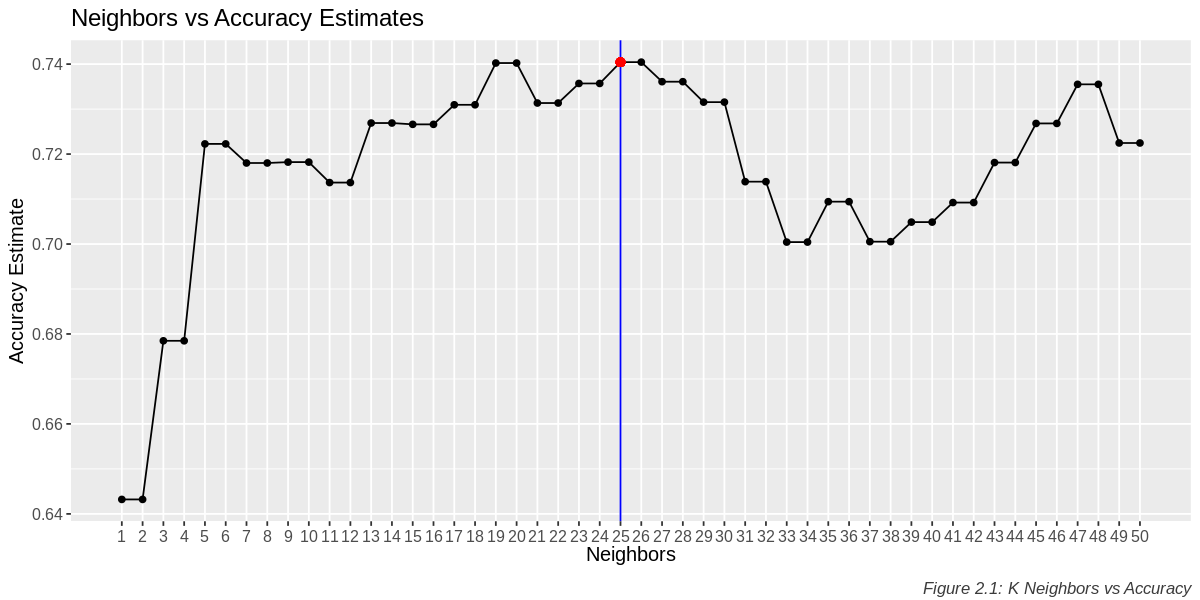

In [9]:
options(repr.plot.width = 10, repr.plot.height = 5)

chosen_k <- knn_results |>
             select(neighbors, mean) |>
             filter(neighbors == 25)|>
             pull(mean)

accuracy_plot <- ggplot(knn_results, aes(x = neighbors, y = mean))+
                 geom_point() +
                 geom_line() +
                 geom_vline(xintercept = 25, colour = "blue") +
                 geom_point(aes(x = 25, y = chosen_k), size = 2, colour = "red") +
                 labs(x = "Neighbors", y = "Accuracy Estimate", caption = "Figure 2.1: K Neighbors vs Accuracy") +
                 ggtitle("Neighbors vs Accuracy Estimates") +
                 scale_x_continuous(limits = c(1, 50), breaks = seq(1, 50), minor_breaks = seq(1, 50, 1)) +
                 theme(text = element_text(size = 12)) +
                 theme(plot.caption = element_text(hjust = 1, vjust = -1, size = 10, face = "italic", color = "#3B3B3B"))

accuracy_plot

From Figure 2.1, we can see that the highest accuracy occurs at two different peaks, when the number of neighbors is 19 or 20, and 25 or 26. Specifically, we can see that the $k$ values next to 25 have the least drop in accuracy out of all the candidates, meaning that 25 should be a reliable value to choose. Moreover, since the K-NN classification algorithm is based on majority votes, it is always a recommended practice to choose an odd number to avoid ties. Therefore, we chose 25 as our $k$-value. 

### Classification and Testing 📊

#### Re-training the Classifier

Once we had our chosen $k$-value, we could then move on to re-train our classification model and test our model using the testing data.

In [10]:
set.seed(21)

# Creating a new KNN spec with 25 neighbors
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 25) |>
            set_engine("kknn") |>
            set_mode("classification")

# Creating workflow with the new spec
heart_fit <- workflow() |>
             add_model(knn_spec) |> 
             add_recipe(heart_recipe) |>
             fit(heart_train)

# Creating predictions with testing data
heart_predictions <- predict(heart_fit, heart_test) |>
                     bind_cols(heart_test)

# Getting accuracy measurement
heart_accuracy <- heart_predictions |>
                  metrics(truth = status, estimate = .pred_class) |>
                  filter(.metric == "accuracy") |>
                  select(.metric, .estimate)

# Displaying the accuracy
heart_accuracy
cat("\nTable 4.1: Prediction Accuracy")

.metric,.estimate
<chr>,<dbl>
accuracy,0.7368421



Table 4.1: Prediction Accuracy

#### Summarizing the Results

From Table 4.1, we can see that the accuracy of our classification model turned out to be 73.68%. To get a better idea of how the classification model performed, we built a confusion matrix.

In [11]:
set.seed(21)

# Creating a confusion matrix for the classification
heart_cm <- heart_predictions |>
            conf_mat(truth = status, estimate = .pred_class)

heart_cm
cat("\nTable 4.2: Confusion Matrix")

          Truth
Prediction Absense Presence
  Absense       34       13
  Presence       7       22


Table 4.2: Confusion Matrix

In summary:

- Our classifier was 73.68% accurate and labeled 56 out of 76 observations correctly
- The precision of the classifier is 22 out of 35 (62.86%). In order words, of all the patients that the model predicted to have heart disease, 62.86% of the patients actually have the disease
- The recall of the classifier is 22 out of 29 (75.86%). In order words, of all the patients who actually have heart disease, the model correctly identify 75.86% of them

## Discussion
---

#### Expected Findings vs Outcome

In [12]:
# potential things to add on
# 1. talk about the results of our findings (accuracy)
#    - accuracy not that high due to dataset not being large enough
#    - observation/sampling sizes are limited by complexity, cost and other requirements
#    - by nature challenging to identify heart disease due to multitude of other underlying risk factors such as diabetes
# 2. usage of this model in the medical field
#    - the model would probably need to take more predictors into account and need higher accuracy before it can be used 
#    - important to improve accuracy as misdiagnosis could potentially cost someone their life

We expect to find that patients with a higher age will more likely have heart disease, as age correlates to increased risk due to deteriorating cardiovascular functions (Rodgers et al., 2019). High blood pressure and cholesterol are considered major risk factors, so patients classified with heart disease will likely have higher levels (Fryar et al., 2012). Maximum heart rate has a close inverse relationship to age (Lach et al., 2012). As heart disease risk increases with age, patients with lower heart rate, suggesting higher age, would increase the probability of heart disease. ST depression induced by exercise relative to rest (seen on ECGs) can help diagnose coronary atherosclerosis (Lanza et al., 2002). Therefore, we may see that higher ST depression is linked to cases of heart disease.

#### Impact of these Findings

This analysis is valuable because we can predict one's risk of heart disease without extensive medical tests. This saves time and resources. Although this does not replace actual diagnoses, this will help patients understand factors associated with heart disease and ways to prevent it.

#### Further Implications

Further investigation could lead to analyzing other variables in the Cleveland dataset, such as fasting blood sugar, to better understand the risk factors associated with heart disease. Moreover, our dataset only contains patient data from one geographic area. A future project could be to compare our dataset and model with other databases to determine if the correlation between risk factors and heart disease observed in this dataset is similar for patients in other parts of the world.

## References
---

Centers for Disease Control and Prevention. (2021, July 19). Coronary artery disease. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/coronary_ad.htm 

Fryar, C. D., Chen, T. C., & Li, X. (2012). Prevalence of uncontrolled risk factors for cardiovascular disease: United States, 1999-2010. NCHS data brief, (103), 1–8.

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, and Detrano,Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Lach, J., Wiecha, S., Śliż, D., Price, S., Zaborski, M., Cieśliński, I., Postuła, M., Knechtle, B., & Mamcarz, A. (2021). Hr max prediction based on age, body composition, fitness level, testing modality and sex in physically active population. Frontiers in Physiology, 12, 695950. https://doi.org/10.3389/fphys.2021.695950

Lanza, G. A., Mustilli, M., Sestito, A., Infusino, F., Sgueglia, G. A., & Crea, F. (2004). Diagnostic and prognostic value of ST segment depression limited to the recovery phase of exercise stress test. Heart (British Cardiac Society), 90(12), 1417–1421. https://doi.org/10.1136/hrt.2003.031260

Rodgers, J. L., Jones, J., Bolleddu, S. I., Vanthenapalli, S., Rodgers, L. E., Shah, K., Karia, K., & Panguluri, S. K. (2019). Cardiovascular Risks Associated with Gender and Aging. Journal of cardiovascular development and disease, 6(2), 19. https://doi.org/10.3390/jcdd6020019